## Importing Packages

%pip install numpy
%pip install opencv-python  
%pip install imutils

---------

- Numpy: For numerical processing.
- imutils: Image processing convenience functions.
- glob: grabbing paths to our input images.
- cv2: OpenCV bindings.

In [1]:
#%% Libraries
import numpy as np
import imutils
import glob
import cv2
import matplotlib.pyplot as plt

## Loading images

**Carga de las imagenes**

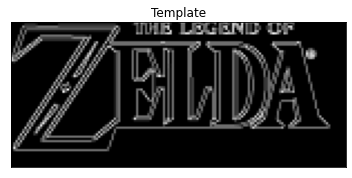

In [23]:
#%% Image loading
images_folder  = 'images/images'

template = cv2.imread('images/templates/zelda_logo.jpeg')

# Data Preprocessing (Grayscale, Canny, shape)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
# template = imutils.resize(template, width=150)
(tH, tW) = template.shape[:2]

plt.figure()
plt.imshow(template, cmap='gray')
plt.title('Template')
plt.xticks([])
plt.yticks([])
plt.show()

**Pro Tip**

We use Canny instead a raw grayscale image for performance purposes. Applying template matching using edges rather than the raw image give us substancial boost in accuracy for template matching. But it must be used in rigid and well defined templates.

--------

Se utiliza Canny en lugar de la imagen a escala de grises pura por razones de rendimiento. El aplicar template Matching utilizando los bordes en lugar de la imagén pura brinda un incremento sustancial en la precisión del método. Sin embargo, deberá utilizarse en plantillas rigidas y bien definidas.

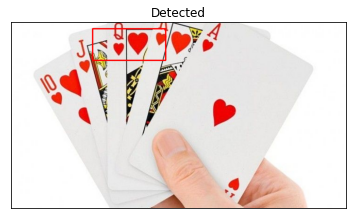

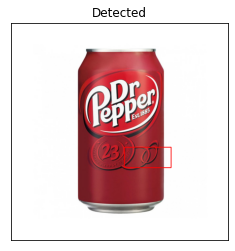

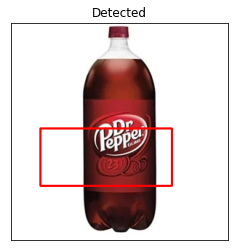

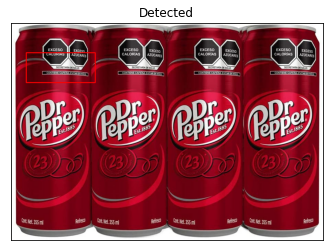

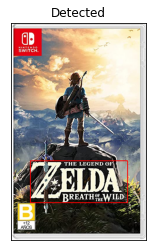

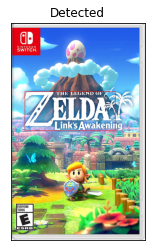

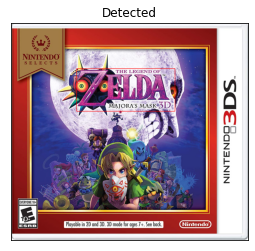

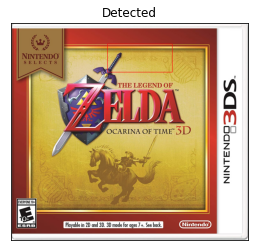

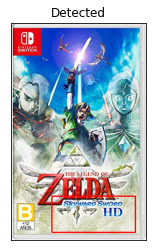

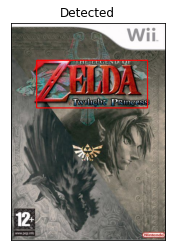

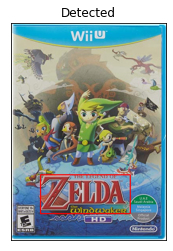

In [24]:
#%% Multi-Scale Trick

# for imagePath in glob.glob(images_folder + '/*.png'):
for imagePath in glob.glob(images_folder + '/*.jpg'):
    # Load the image, convert it to grayscale and initialize
    # the bookkeeping variable to keep track of the matched region.
    # Se carga la imagen, se convierte a escala de grises y se inizializa
    # una variable para mantener un registro de la región de la coincidencia.
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    # Loop over the scales of the image
    # Iteramos sobre las escalas de la imagen.
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # Resize the image according to the scale, and keep track
        # of the ratio of the resizing
        # Se redimensiona la imagen de acuerdo a la escala, y se mantiene
        # un registro de la relación de redimensionamiento
        resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        # If the resized image is smaller than the template, then break
        # Se rompe si la imagen redimensionada es más pequeña que la plantilla
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Detect edges in the resized, grayscale image and apply template
        # matching to find the template in the image.
        # Detectamos bordes en la imagen redimensionada, en escala de grises y aplicamos
        # templateMatching para encontrar la plantilla en la imagen.
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        # Returns minVal, maxVal, minLoc, maxLoc
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        
        # Draw bounding box
        # Dibuja el cuadro delimitador

        '''
        clone = np.dstack([edged, edged, edged])
        cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
                     (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
         
        plt.figure()
        plt.imshow(clone, cmap='gray')
        plt.title('Detected')
        plt.xticks([]), plt.yticks([])
        plt.show()
        '''        

        # If we have found a new maximum correlation value, then update
        # the bookkeeping variable
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    # unpack the bookkeeping variable and compute the (x, y) coordinates of the bounding
    # box based on the resized ratio
    # Se desempaqueta la variable de encontrado y se calculan las coordenadas (x, y) del
    # cuadro delimitador basado en la relación de redimensionamiento
    (_, maxLoc, r) = found
    (startX, startY) = int(maxLoc[0] * r), int(maxLoc[1] * r)
    (endX, endY) = int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)

    # Draw a bounding box around the detected result and display the image
    # Dibuja un cuadro delimitador alrededor del resultado detectado y muestra la imagen
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    plt.figure()
    plt.imshow(image[:,:,::-1])
    plt.title('Detected')
    plt.xticks([]), plt.yticks([])
    plt.show()

-----------

## Conclusion

This time you can check if there's a match in multiple images. You can add multi-template-matching adding part of the code of the folder `template-matching` but this is up to you.